MNIST Digit Recognition

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist

In [3]:
# Step 2: Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

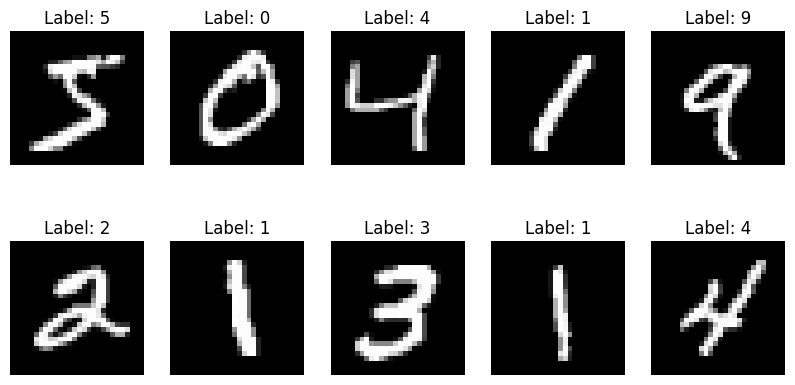

In [4]:
# Step 3: Visualize Sample Digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
# Step 4: Preprocess Data
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0  # Flatten and normalize
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

In [7]:
# Step 5: Split Training Data (if needed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train the Model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy on Test Data: 0.7407

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       980
           1       0.55      0.99      0.71      1135
           2       0.90      0.65      0.76      1032
           3       0.63      0.83      0.72      1010
           4       0.83      0.79      0.81       982
           5       0.98      0.17      0.29       892
           6       0.84      0.85      0.85       958
           7       0.74      0.86      0.80      1028
           8       0.88      0.57      0.69       974
           9       0.84      0.64      0.73      1009

    accuracy                           0.74     10000
   macro avg       0.80      0.73      0.72     10000
weighted avg       0.79      0.74      0.72     10000



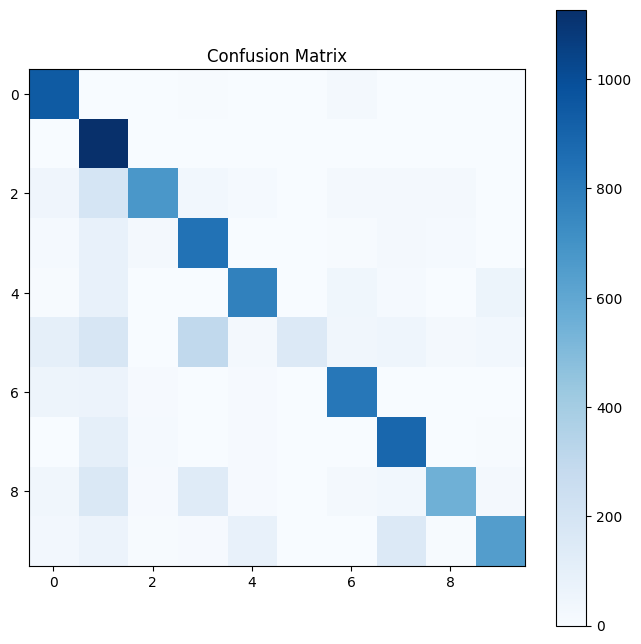

In [9]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix")
plt.show()

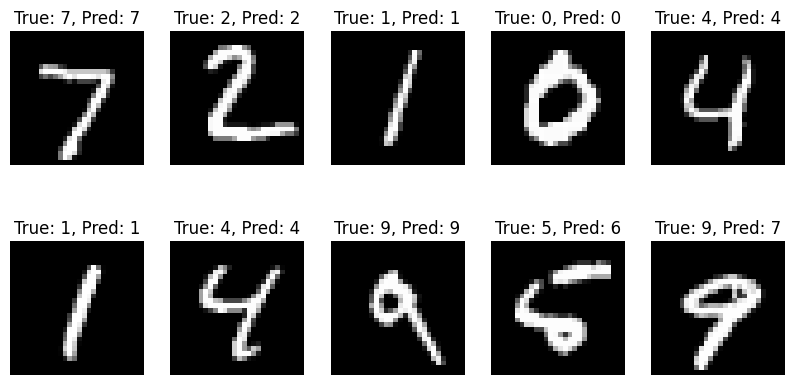

In [10]:
# Step 8: Visualize Predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()